In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
np.random.seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


CPU times: user 9.06 s, sys: 1.5 s, total: 10.6 s
Wall time: 21 s


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Define the corrected file paths
train_file_path = "/content/drive/MyDrive/Punny_Punctuators/HateSpeech/training_data_telugu-hate.xlsx"
# train_file_path = "/content/drive/MyDrive/Punny_Punctuators/HateSpeech/roman_aug.csv"
test_file_path = "/content/drive/MyDrive/Punny_Punctuators/HateSpeech/telugu-english-test-data-with-labels.xlsx"

# Load the CSV files
train_data = pd.read_excel(train_file_path)
# train_data = pd.read_csv(train_file_path)
test_data = pd.read_excel(test_file_path, header=None)

In [ ]:
train_data.shape

(4000, 3)

In [ ]:
train_data.columns

Index(['S.No', 'Comments', 'Label'], dtype='object')

In [ ]:
test_data.shape

(500, 3)

In [ ]:
test_data.columns

Int64Index([0, 1, 2], dtype='int64')

In [ ]:
train_data['enc_label'].value_counts()

KeyError: 'enc_label'

In [ ]:
test_data[2].value_counts()

non-hate    250
hate        250
Name: 2, dtype: int64

In [ ]:
train_data['enc_label'] = train_data['Label'].replace({'hate': 0, 'non-hate': 1})

KeyError: 'Label'

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame(encoder.fit_transform(train_data[['Label']]))
encoded_labels.columns = encoder.get_feature_names_out(['Label'])
train_data = pd.concat([train_data, encoded_labels], axis=1)

In [ ]:
train_data.sample(10)

,S.No,Comments,Label,enc_label,Label_hate,Label_non-hate
555,HATE_1556,ప్రవీణ్ కుమార్ సర్ garu నిజంగా dynamic police ...,non-hate,1,0.0,1.0
3491,HATE_4492,"Ekkada stop chesado akkade kottesthadu ,virat ...",non-hate,1,0.0,1.0
527,HATE_1528,Phone cut chesthey inka yavaritho mataladestha...,non-hate,1,0.0,1.0
3925,HATE_4926,Sadist gadu ruling,hate,0,1.0,0.0
2989,HATE_3990,Dress bavundi kaani phone poyindi,non-hate,1,0.0,1.0
70,HATE_1071,Anna nuvu chepthuntevoka emotion vasthundanna,non-hate,1,0.0,1.0
1756,HATE_2757,Blood breed veru. Mental certification kuda,hate,0,1.0,0.0
211,HATE_1212,Endhukura ayya pichi pichi thumbnails pedtharu???,hate,0,1.0,0.0
196,HATE_1197,Ravi అన్న అన్నది నిజమే అని ఈపాటికే నటరాజ్ మాస్...,hate,0,1.0,0.0
803,HATE_1804,"RK గారు మీకు, మీ టీం కి దన్యవాదాలు, సుతి మెత్త...",non-hate,1,0.0,1.0


In [ ]:
punctuations = '''’'!()-[]{};:'"\,<>./?@#$%^&*_~�'''

def remove_punctuation_url(d):
    # d=d.lower()
    d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', d, flags=re.MULTILINE) #This line is for removing url
    review = d.replace('\n', '')
    no_punct = ""
    for char in review:
      if char not in punctuations:
         no_punct = no_punct + char
    return no_punct

def cleantext(string):
    text = string.split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)
    tx = text.replace('&amp',' ')
    #text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    # text = text.split()
    # text = [w for w in text if not w in stops]
    # text = " ".join(text)
    text = re.sub(r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+", ' ', text)

    return text

def clean(text):
  if not isinstance(text, str):
    return ''

  # print('Text: ', text)
  text = remove_punctuation_url(text)
  text = cleantext(text)
  # print('Output: ', text)
  # print(" ")

  if not isinstance(text, str):
    return ''

  return text

In [ ]:
train_data.dropna(how='any', inplace=True)

In [ ]:
train_data['cleaned'] = train_data['Comments'].apply(clean)
test_data['cleaned'] = test_data[1].apply(clean)

In [ ]:
test_data.sample(10)

,0,1,2,cleaned
361,362,నేను జంతువును నాకు అటువంటి ఫీలింగ్స్ ఏమి ఉండవు.,hate,నేను జంతువును నాకు అటువంటి ఫీలింగ్స్ ఏమి ఉండవు
73,74,Movie block buster Mass jathara bomma daddari...,non-hate,Movie block buster Mass jathara bomma daddaril...
374,375,దీని వాయిస్ దరిద్రంగా ఉంటుంది,hate,దీని వాయిస్ దరిద్రంగా ఉంటుంది
155,156,"బండి ఆమెకి సాయం చేశారు., అలాగే పిల్లలు కి కొని...",non-hate,బండి ఆమెకి సాయం చేశారు అలాగే పిల్లలు కి కొని ప...
104,105,Shekhar master indulo unnada leda?,non-hate,Shekhar master indulo unnada leda
394,395,దోచాడు జైలు కి వెళ్ళాడు .. మళ్లి వెళ్తాడు తొంద...,hate,దోచాడు జైలు కి వెళ్ళాడు మళ్లి వెళ్తాడు తొందర్లో
377,378,dheniki pelliyenti varada adi,hate,dheniki pelliyenti varada adi
124,125,naku annayya ledhu,non-hate,naku annayya ledhu
68,69,E phone Baya inta clarity vachindi video adi t...,non-hate,E phone Baya inta clarity vachindi video adi t...
450,451,పోవే లోఫర్ మీ జగన్ నువ్వు కలిసి ఆడుకోండి,hate,పోవే లోఫర్ మీ జగన్ నువ్వు కలిసి ఆడుకోండి


In [ ]:
def data_statistics(class_names):
  words_per_class = []
  unique_words_per_class = []
  documents_per_class = []

  for label in class_names:
    ## Word list from the clean dataset
    word_list = [word.strip().lower() for t in list(train_data[train_data.Label==label].cleaned) for word in t.strip().split()]
    counts = dict()
    for w in word_list:
      counts[w] = counts.get(w, 0)+1
    # Sort the word list on descending order in terms of frequency
    ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    # Total words per class
    words_per_class.append(len(word_list))
    # Unique words per class
    unique_words_per_class.append(len(np.unique(word_list)))
    # Number of documents per class
    documents_per_class.append(len(list(train_data[train_data.Label==label].cleaned)))

    print("Class name: {}".format(label))
    print("Number of words: {}".format(len(word_list)))
    print("Number of unique words: {}".format(len(np.unique(word_list))))
    print("Number of Documents: {}".format(len(list(train_data[train_data.Label==label].cleaned))))
    print("10 most frequent words:\n")
    for i, f in ordered[:10]:
      print("{}\t{}".format(i, f))

  return words_per_class, unique_words_per_class, documents_per_class

class_names = ['hate','non-hate']

words, unique_words, documents = data_statistics(class_names)

Class name: hate
Number of words: 18094
Number of unique words: 8804
Number of Documents: 1939
10 most frequent words:

ra	147
ki	132
ni	126
lo	123
ga	80
oka	76
na	58
ani	54
nuvvu	53
kuda	52
Class name: non-hate
Number of words: 21378
Number of unique words: 9053
Number of Documents: 2061
10 most frequent words:

చాలా	148
lo	132
anna	129
గారు	121
ఈ	118
సూపర్	112
sir	108
అన్న	104
ki	103
ga	89


In [ ]:
!pip install ktrain
import ktrain

In [ ]:
!pip install ai4bharat-transliteration

In [ ]:
from ai4bharat.transliteration import XlitEngine

e = XlitEngine("te", beam_width=10)

def transliteration(text):
    out = e.translit_sentence(text)
    return out["te"]

Initializing Multilingual model for transliteration


Loading dicts into RAM: 100%|██████████| 1/1 [00:13<00:00, 13.13s/it]


In [ ]:
!pip install tqdm
from tqdm import tqdm
tqdm.pandas(desc='Transliteration') ## For viewwing progress

In [ ]:
train_data['transliterated_text'] = train_data['cleaned'].progress_apply(transliteration)
train_data.sample(10)
train_data.to_csv('/content/drive/MyDrive/Punny_Punctuators/HateSpeech/PURE_TE_train_transliterated.csv')

,S.No,Comments,Label,enc_label,Label_hate,Label_non-hate,cleaned,transliterated_text
1938,HATE_2939,కొంచం ఘాటుగా వ్యాఖ్యానించారు...... కానీ నిజం అ...,non-hate,1,0.0,1.0,కొంచం ఘాటుగా వ్యాఖ్యానించారు కానీ నిజం అదే కదా…,కొంచం ఘాటుగా వ్యాఖ్యానించారు కానీ నిజం అదే కదా…
155,HATE_1156,దేవి అడిగే ప్రశ్నలకు గట్టిగా దింపావూ గా (సమాధా...,hate,0,1.0,0.0,దేవి అడిగే ప్రశ్నలకు గట్టిగా దింపావూ గా సమాధాన...,దేవి అడిగే ప్రశ్నలకు గట్టిగా దింపావూ గా సమాధాన...
1723,HATE_2724,జై మెగాస్టార్,non-hate,1,0.0,1.0,జై మెగాస్టార్,జై మెగాస్టార్
1882,HATE_2883,arshadeep ni asla enduku tisukonnario telidhu ...,hate,0,1.0,0.0,arshadeep ni asla enduku tisukonnario telidhu ...,అర్షదీప్ ని అస్లా ఎందుకు తీసుకొన్నారియో తెలిదు...
3959,HATE_4960,Ap ప్రజలు పెంట తింటున్నారు కాబట్టి ఇలాంటి నాయక...,hate,0,1.0,0.0,Ap ప్రజలు పెంట తింటున్నారు కాబట్టి ఇలాంటి నాయక...,ఏపీ ప్రజలు పెంట తింటున్నారు కాబట్టి ఇలాంటి నాయ...
654,HATE_1655,అయ్య ఎంపీ గారు నీ మీద వీడియో ఎవరో కుట్రలుచేసి ...,hate,0,1.0,0.0,అయ్య ఎంపీ గారు నీ మీద వీడియో ఎవరో కుట్రలుచేసి ...,అయ్య ఎంపీ గారు నీ మీద వీడియో ఎవరో కుట్రలుచేసి ...
3087,HATE_4088,నువ్వు పడింది మంచి గాఉంది బ్రో,non-hate,1,0.0,1.0,నువ్వు పడింది మంచి గాఉంది బ్రో,నువ్వు పడింది మంచి గాఉంది బ్రో
77,HATE_1078,""" MAA"" president ga gelipiste yedo peekutanu a...",hate,0,1.0,0.0,MAA president ga gelipiste yedo peekutanu anna...,మా ప్రెసిడెంట్ గా గెలిపిస్తే ఏదో పీకుతాను అన్న...
3608,HATE_4609,Eema em peekindhi ra judge la pettaru,hate,0,1.0,0.0,Eema em peekindhi ra judge la pettaru,ఈమ ఇఎం పీకింది రా జడ్జ్ లా పెట్టారు
580,HATE_1581,jai kodali nani meru oka dynamic leader,non-hate,1,0.0,1.0,jai kodali nani meru oka dynamic leader,జై కొడాలి నాని మేరు ఒక డైనమిక్ లీడర్


In [ ]:
test_data['transliterated_text'] = test_data['cleaned'].progress_apply(transliteration)
test_data.to_csv('/content/drive/MyDrive/Punny_Punctuators/HateSpeech/PURE_TE_test_transliterated.csv')

In [ ]:
!pip install ktrain

In [ ]:
categories = ['hate', 'non-hate']

In [ ]:
train_data.sample(10)

,Unnamed: 0,Text,enc_label,cleaned
5489,1489,asal charanh anna looks evariki undav highly s...,1,asal charanh anna looks evariki undav highly s...
2577,2577,bjp leaders enta labaor na kodukulu ante rape ...,0,bjp leaders enta labaor na kodukulu ante rape ...
3692,3692,Edi lanja kabate ela janalanu chedakodutundi,0,Edi lanja kabate ela janalanu chedakodutundi
7467,3467,janaalu telivaina vaallu kabatte ilah tiragaba...,1,janaalu telivaina vaallu kabatte ilah tiragaba...
7565,3565,lanjakodukulu speed gaa 150200cc bikes nadipe ...,0,lanjakodukulu speed gaa 150200cc bikes nadipe ...
4718,718,aaa b n endee radhakrishna gaari kii chukkalu ...,1,aaa b n endee radhakrishna gaari kii chukkalu ...
6280,2280,arrie pulka family chuusi videos aa evicontrol...,0,arrie pulka family chuusi videos aa evicontrol...
1123,1123,anni kalisi velthe ne 05 votes diffrent Ippdu ...,0,anni kalisi velthe ne 05 votes diffrent Ippdu ...
4046,46,poraored flower,0,poraored flower
3617,3617,Kutta chinchi para dengutaam,0,Kutta chinchi para dengutaam


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data['cleaned'], train_data["enc_label"],stratify=train_data['enc_label'],random_state=42,test_size=0.2)

In [ ]:
X_train = X_train.tolist()
y_train = y_train.tolist()
X_test = X_test.tolist()
y_test = y_test.tolist()

In [ ]:
from ktrain import text
import ktrain

In [ ]:
model_name = 'ai4bharat/indic-bert' #'bert-base-multilingual-uncased' #l3cube-pune/telugu-bert #ai4bharat/indic-bert #xlm-roberta-base
trans = text.Transformer(model_name,maxlen=250,class_names=categories)

config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/135M [00:00<?, ?B/s]

In [ ]:
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_test,y_test)

preprocessing train...
language: et
train sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33


spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: et
test sequence lengths:
	mean : 10
	95percentile : 20
	99percentile : 34


In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [ ]:
# learner.lr_find()

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced'
                                               ,classes = np.unique(train_data['enc_label'])
                                               ,y = train_data['enc_label'])
class_weights = dict(zip(np.unique(train_data['enc_label']), class_weights))

In [ ]:
weight = {i : class_weights[i] for i in range(2)}
weight

{0: 1.0313386639153985, 1: 0.9705097087378641}

In [ ]:
learner.fit_onecycle(2e-5,6,class_weight=weight)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/6
534/534 [==============================] - 364s 642ms/step - loss: 0.6900 - accuracy: 0.5410 - val_loss: 0.6811 - val_accuracy: 0.5969
Epoch 2/6
534/534 [==============================] - 338s 634ms/step - loss: 0.6761 - accuracy: 0.5789 - val_loss: 0.6333 - val_accuracy: 0.6500
Epoch 3/6
534/534 [==============================] - 338s 634ms/step - loss: 0.6357 - accuracy: 0.6403 - val_loss: 0.5943 - val_accuracy: 0.6925
Epoch 4/6
534/534 [==============================] - 338s 634ms/step - loss: 0.5823 - accuracy: 0.6947 - val_loss: 0.5722 - val_accuracy: 0.6794
Epoch 5/6
534/534 [==============================] - 338s 634ms/step - loss: 0.4922 - accuracy: 0.7652 - val_loss: 0.5172 - val_accuracy: 0.7394
Epoch 6/6
534/534 [==============================] - 338s 633ms/step - loss: 0.3963 - accuracy: 0.8309 - val_loss: 0.5314 - val_accuracy: 0.7469


In [ ]:
learner.validate(class_names=categories)

50/50 [==============================] - 20s 356ms/step
              precision    recall  f1-score   support

        hate       0.73      0.77      0.75       776
    non-hate       0.77      0.73      0.75       824

    accuracy                           0.75      1600
   macro avg       0.75      0.75      0.75      1600
weighted avg       0.75      0.75      0.75      1600



array([[596, 180],
       [225, 599]])

In [ ]:
ktrain.get_predictor(learner.model,preproc=trans).save('/content/drive/MyDrive/Punny_Punctuators/HateSpeech/m-bert')

In [ ]:
final_dataset.dropna(how='any', inplace=True)

In [ ]:
from ktrain import text
import ktrain

In [ ]:
# model_name_1 = 'l3cube-pune/telugu-bert' #xlm-roberta-base #bert-base-multilingual-uncased
model_name_1 = 'bert-base-multilingual-uncased'  #ai4bharat/indic-bert

trans_1 = text.Transformer(model_name_1,maxlen=250,class_names=categories)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_dataset['Text'], final_dataset["enc_label"],stratify=final_dataset['enc_label'],random_state=42,test_size=0.2)

In [ ]:
X_train = X_train.tolist()
y_train = y_train.tolist()
X_test = X_test.tolist()
y_test = y_test.tolist()

In [ ]:
train_1 = trans_1.preprocess_train(X_train,y_train)
valid_1 = trans_1.preprocess_test(X_test,y_test)

preprocessing train...
language: te
train sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: te
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33


In [ ]:
model_1 = trans_1.get_classifier()

In [ ]:
learner_1 = ktrain.get_learner(model_1, train_data=train_1,val_data=valid_1, batch_size=16)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced'
                                               ,classes = np.unique(final_dataset['enc_label'])
                                               ,y = final_dataset['enc_label'])
class_weights = dict(zip(np.unique(final_dataset['enc_label']), class_weights))

In [ ]:
weight = {i : class_weights[i] for i in range(2)}
weight

{0: 1.0312983662940671, 1: 0.9705453956950963}

In [ ]:
learner_1.fit_onecycle(2e-5,6,class_weight=weight)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/6
600/600 [==============================] - 571s 893ms/step - loss: 0.6199 - accuracy: 0.6410 - val_loss: 0.5159 - val_accuracy: 0.7416
Epoch 2/6
600/600 [==============================] - 552s 921ms/step - loss: 0.4836 - accuracy: 0.7690 - val_loss: 0.5114 - val_accuracy: 0.7599
Epoch 3/6
600/600 [==============================] - 536s 893ms/step - loss: 0.3652 - accuracy: 0.8393 - val_loss: 0.4654 - val_accuracy: 0.7941
Epoch 4/6
600/600 [==============================] - 535s 892ms/step - loss: 0.2303 - accuracy: 0.9114 - val_loss: 0.3996 - val_accuracy: 0.8424
Epoch 5/6
600/600 [==============================] - 535s 892ms/step - loss: 0.1165 - accuracy: 0.9579 - val_loss: 0.4826 - val_accuracy: 0.8558
Epoch 6/6
600/600 [==============================] - 535s 892ms/step - loss: 0.0546 - accuracy: 0.9813 - val_loss: 0.5435 - val_accuracy: 0.8608


In [ ]:
learner_1.validate(class_names=categories)

75/75 [==============================] - 28s 326ms/step
              precision    recall  f1-score   support

        hate       0.87      0.83      0.85      1163
    non-hate       0.85      0.89      0.87      1236

    accuracy                           0.86      2399
   macro avg       0.86      0.86      0.86      2399
weighted avg       0.86      0.86      0.86      2399



array([[ 968,  195],
       [ 139, 1097]])

In [ ]:
ktrain.get_predictor(learner_1.model,preproc=trans_1).save('/content/drive/MyDrive/Punny_Punctuators/HateSpeech/aug-m-bert')

In [ ]:
predictor = ktrain.get_predictor(learner_1.model,preproc=trans_1)

In [ ]:
test_data['Label'] = test_data['cleaned'].progress_apply(predictor.predict)

Transliteration: 100%|██████████| 500/500 [01:23<00:00,  5.97it/s]


In [ ]:
test_data.sample(10)

,0,1,cleaned,Label
189,190,Chala akali vesthundhi baga,Chala akali vesthundhi baga,non-hate
234,235,Edi choosi kuda srihan ni blame chstunru anta ...,Edi choosi kuda srihan ni blame chstunru anta ...,non-hate
266,267,Pooooove langa Dana ............tu ne bratuku ...,Pooooove langa Dana tu ne bratuku karona Aina ...,hate
293,294,Lanjalaku pelii eanduku,Lanjalaku pelii eanduku,hate
9,10,మ్మెల్యే కాకముందే పోలీస్ ఆఫీసర్ ఇలా నించో పెడు...,మ్మెల్యే కాకముందే పోలీస్ ఆఫీసర్ ఇలా నించో పెడు...,hate
337,338,మూడేళ్లకే ఆంధ్రప్రదేశ్ మొత్తం దరిద్రం అనుభవిస్...,మూడేళ్లకే ఆంధ్రప్రదేశ్ మొత్తం దరిద్రం అనుభవిస్...,hate
398,399,పోతాడు లే వాళ్ళ నాన్న లాగే త్వరలో .. నువ్వు కూ...,పోతాడు లే వాళ్ళ నాన్న లాగే త్వరలో నువ్వు కూడా ...,hate
257,258,neeku sigu ledhu chi west,neeku sigu ledhu chi west,hate
489,490,అబ్బా ఇది సంసారి కేవలం సేవ చేస్తుంది,అబ్బా ఇది సంసారి కేవలం సేవ చేస్తుంది,hate
419,420,niku vote vasavadikina siggu vundali,niku vote vasavadikina siggu vundali,hate


In [ ]:
final_output = test_data[[0, 1, 'Label']]
final_output = final_output.rename(columns={1: 'Comments', 0:'Serial'})

final_output.sample(10)

,Serial,Comments,Label
347,348,"ఛీఛీ ఇంతదారుణమైనమనిషిని,నీచమైనవక్తినిచూడలేదు.",non-hate
16,17,నాకూ రాజకీయాలు కాదు కానీ నీ డైలాగ్ డెలివరీ బాగ...,non-hate
30,31,అప్పటికన్నా ఇప్పుడే బాగుంది,non-hate
59,60,Miku mana support yeppudi untundi Annayya we l...,non-hate
429,430,"మొహం మీద మాస్క్ ఎందుకు రా, బయటకు వస్తే కుక్కను...",hate
199,200,Akka annadi photo pettu chudam,non-hate
378,379,lanja laga vunnav,hate
204,205,Abba nv super ga chesavu e video 70times chusa,non-hate
487,488,పెద్దగా ఉన్నాయని కింద పెట్టుకునేవు,hate
31,32,బాలయ్య బాబునే అయోమయంలో పెట్టించావుగా అన్నా,non-hate


In [ ]:
final_output.to_csv('/content/drive/MyDrive/Punny_Punctuators/HateSpeech/output-aug-telugu-bert.tsv', index=False, header=False, sep="\t")

In [ ]:
# Define the corrected file paths
train_file_path = "/content/drive/MyDrive/Punny_Punctuators/HateSpeech/train_transliterated.csv"

# Load the CSV files
train_data = pd.read_csv(train_file_path)

In [ ]:
train_data.sample(10)

,Unnamed: 0,S.No,Comments,Label,enc_label,Label_hate,Label_non-hate,cleaned,transliterated_text
1018,1018,HATE_2019,Charmi ki Edo ayindi navvaleka sachipothundi,hate,0,1.0,0.0,Charmi ki Edo ayindi navvaleka sachipothundi,చార్మి కి ఏదో అయింది నవ్వలేక సచ్చిపోతుంది
800,800,HATE_1801,ఆరెంజ్ సూపర్ మూవీ ..ఈ..రోజులో...సూపర్ హిట్ అయ్...,non-hate,1,0.0,1.0,ఆరెంజ్ సూపర్ మూవీ ఈరోజులోసూపర్ హిట్ అయ్యేదినాక...,ఆరెంజ్ సూపర్ మూవీ ఈరోజులోసూపర్ హిట్ అయ్యేదినాక...
3747,3747,HATE_4748,పాప చేతికి కత్తి ఇచ్చే సీన్ ఎన్నిసార్లు చూసినా...,non-hate,1,0.0,1.0,పాప చేతికి కత్తి ఇచ్చే సీన్ ఎన్నిసార్లు చూసినా...,పాప చేతికి కత్తి ఇచ్చే సీన్ ఎన్నిసార్లు చూసినా...
1197,1197,HATE_2198,Votes vesi gelipinchukoni...Visham Taaguthunna...,hate,0,1.0,0.0,Votes vesi gelipinchukoniVisham Taaguthunnaru ...,వోట్స్ వేసి గెలిపించుకొనివిషం తాగుతున్నారు ఏపీ...
737,737,HATE_1738,ఇలాంటి మాటలతో ఇంకా ఎన్ని రోజులు ప్రజలను మోసం చ...,hate,0,1.0,0.0,ఇలాంటి మాటలతో ఇంకా ఎన్ని రోజులు ప్రజలను మోసం చ...,ఇలాంటి మాటలతో ఇంకా ఎన్ని రోజులు ప్రజలను మోసం చ...
3078,3078,HATE_4079,Shekar master Appatlo Sadha garitho dhee lo da...,non-hate,1,0.0,1.0,Shekar master Appatlo Sadha garitho dhee lo da...,శేఖర్ మాస్టర్ అప్పట్లో సాధా గరితో దీ లో డాన్స్...
1421,1421,HATE_2422,సార్ మీరు 100% కరెక్ట్ చెప్పారు సార్ కాకపోతే ఇ...,non-hate,1,0.0,1.0,సార్ మీరు 100 కరెక్ట్ చెప్పారు సార్ కాకపోతే ఇం...,సార్ మీరు ౧౦౦ కరెక్ట్ చెప్పారు సార్ కాకపోతే ఇం...
3391,3391,HATE_4392,శివగారు మీ anchoring చాలా చాలా బాగుంది..simply...,non-hate,1,0.0,1.0,శివగారు మీ anchoring చాలా చాలా బాగుందిsimply s...,శివగారు మీ యాంకరింగ్ చాలా చాలా బాగుందిసింప్లీ ...
2863,2863,HATE_3864,Blockbuster song ni entha direct ga copy kotte...,hate,0,1.0,0.0,Blockbuster song ni entha direct ga copy kotte...,బ్లాక్బస్టర్ సాంగ్ ని ఎంత డైరెక్ట్ గా కాపీ కొట...
3092,3092,HATE_4093,అంతా మీ కష్టార్జితం అన్న...మీరు ఎప్పుడు సంతోషం...,non-hate,1,0.0,1.0,అంతా మీ కష్టార్జితం అన్నమీరు ఎప్పుడు సంతోషంగా ...,అంతా మీ కష్టార్జితం అన్నమీరు ఎప్పుడు సంతోషంగా ...


In [ ]:
from ai4bharat.transliteration import XlitEngine

e = XlitEngine(src_script_type="indic", beam_width=10)

def transliteration(text):
    if not isinstance(text, str):
      return ''

    # print('Original:', text)
    out = e.translit_sentence(text, lang_code="te")

    # print('Transliterated:', out)
    return out

Initializing Multilingual model for transliteration


Loading dicts into RAM: 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]


In [ ]:
train_data['transliterated_text'] = train_data['cleaned'].progress_apply(transliteration)
train_data.sample()

In [ ]:
train_data['rev_transliteration'] = train_data['transliterated_text'].progress_apply(transliteration)
train_data.sample()

Transliteration: 100%|██████████| 4000/4000 [56:53<00:00,  1.17it/s]


,S.No,Comments,Label,enc_label,Label_hate,Label_non-hate,cleaned,transliterated_text,rev_transliteration
1883,HATE_2884,vijay shankar anna 3d anna enti anna na lavadi...,hate,0,1.0,0.0,vijay shankar anna 3d anna enti anna na lavadi...,విజయ్ శంకర్ అన్న ౩డ్ అన్న ఏంటి అన్న నా లావాడియ...,vijay shankar anna 3d anna enti anna naa lavad...


In [ ]:
train_data.sample(10)

,S.No,Comments,Label,enc_label,Label_hate,Label_non-hate,cleaned,transliterated_text,rev_transliteration
3026,HATE_4027,మేడం కు ఉక్క పోస్తునట్టుంది సంకలో బాడీ వేసుకుంది,hate,0,1.0,0.0,మేడం కు ఉక్క పోస్తునట్టుంది సంకలో బాడీ వేసుకుంది,మేడం కు ఉక్క పోస్తునట్టుంది సంకలో బాడీ వేసుకుంది,medam kuu ukka poostunattundi sankalo body ves...
2622,HATE_3623,Fake luchha news ra jaffa,hate,0,1.0,0.0,Fake luchha news ra jaffa,ఫేక్ లూచా న్యూస్ రా జఫ్ఫా,fake lucha news raa jaffa
3748,HATE_4749,పరమానందయ శిష్యులు,non-hate,1,0.0,1.0,పరమానందయ శిష్యులు,పరమానందయ శిష్యులు,paramanandaya shishyulu
1704,HATE_2705,ఆపు రా డ్రామా రావు అన్ని సొల్లు కబుర్లు,hate,0,1.0,0.0,ఆపు రా డ్రామా రావు అన్ని సొల్లు కబుర్లు,ఆపు రా డ్రామా రావు అన్ని సొల్లు కబుర్లు,aapu raa drama raavu anni sollu kaburlu
118,HATE_1119,Nijam ayyina reddlu tdp ki support ga undali,non-hate,1,0.0,1.0,Nijam ayyina reddlu tdp ki support ga undali,నిజం అయ్యిన రెడ్లు టీడీపీ కి సపోర్ట్ గా ఉండాలి,nizam ayyina redlu tdp kii support gaa undaali
2564,HATE_3565,నేను సచ్చిపోత బాబోయ్..ఉరి ఏది..విషం ఏది..నా రై...,hate,0,1.0,0.0,నేను సచ్చిపోత బాబోయ్ఉరి ఏదివిషం ఏదినా రైలు ఏది...,నేను సచ్చిపోత బాబోయ్ఉరి ఏదివిషం ఏదినా రైలు ఏది...,neenu sachipota baboyuri edivisham edina railu...
1633,HATE_2634,ఆ పూజ కన్నా ఈ పూజనే బాగుంది..,non-hate,1,0.0,1.0,ఆ పూజ కన్నా ఈ పూజనే బాగుంది,ఆ పూజ కన్నా ఈ పూజనే బాగుంది,aa pooja kannah ee poojane baagundi
364,HATE_1365,పేద బిడ్డల కోసం చేస్తున్న మీరు చేస్తున్న కృషి ...,non-hate,1,0.0,1.0,పేద బిడ్డల కోసం చేస్తున్న మీరు చేస్తున్న కృషి ...,పేద బిడ్డల కోసం చేస్తున్న మీరు చేస్తున్న కృషి ...,pedha biddala kosam chestunna meeru chestunna ...
385,HATE_1386,"Emumdi le Narayana swamy... Court karchulu, la...",hate,0,1.0,0.0,Emumdi le Narayana swamy Court karchulu lawyer...,ఏముంది లే నారాయణ స్వామి కోర్ట్ కర్చులు లేవర్స్...,emundi lae narayana swami court karchulu laver...
1883,HATE_2884,vijay shankar anna 3d anna enti anna na lavadi...,hate,0,1.0,0.0,vijay shankar anna 3d anna enti anna na lavadi...,విజయ్ శంకర్ అన్న ౩డ్ అన్న ఏంటి అన్న నా లావాడియ...,vijay shankar anna 3d anna enti anna naa lavad...


In [ ]:
original_data = train_data[['cleaned', 'enc_label']]
original_data = original_data.rename(columns={'cleaned': 'Text'})
original_data.dropna(how='any', inplace=True)

fwd_translit = train_data[['transliterated_text', 'enc_label']]
fwd_translit = fwd_translit.rename(columns={'transliterated_text': 'Text'})
fwd_translit.dropna(how='any', inplace=True)


back_translit = train_data[['rev_transliteration', 'enc_label']]
back_translit = back_translit.rename(columns={'rev_transliteration': 'Text'})
back_translit.dropna(how='any', inplace=True)

In [ ]:
pure_telugu_dataset = pd.concat([original_data, fwd_translit])
pure_telugu_dataset.to_csv('/content/drive/MyDrive/Punny_Punctuators/HateSpeech/pure_telugu_aug.csv')
pure_telugu_dataset.sample(10)

,Text,enc_label
3419,దిని చూసతేయ్ చాలు నది సొల్ల లెగిసిపోతుంది,0
2008,చిరంజీవి గారు మనసులో ఏం పెట్టుకోకుండా అంత మంచి...,0
2484,oka ammai vi vundhi natho argue chesthava puku...,0
3674,Edo bajaru lanja edi di ni action,0
3107,ముందుగా ప్రజలు మారాలి చట్టాలను కాపాడుకోవాలి స్...,1
1687,వాడు బానే ఉన్నాడు నువ్వు చూస్కో నేది,0
2309,అయితే పోయి మాస్టర్ గాడి మొడ్డ గుడువు,0
3604,Kutha chilchhii Pagaal dhangaav aani ardam,0
2282,Gunturodi yetakaram ante itlane untadi mari,1
999,niku family undi gah ra jagratamma venkata,0


In [ ]:
pure_telugu_dataset['enc_label'].value_counts()

1    4122
0    3878
Name: enc_label, dtype: int64

In [ ]:
roman_aug_dataset = pd.concat([original_data, back_translit])
roman_aug_dataset.to_csv('/content/drive/MyDrive/Punny_Punctuators/HateSpeech/roman_aug.csv')
roman_aug_dataset.sample(10)

,Text,enc_label
3885,Are meru marara dappukottu kovam,0
3754,నీ అందానికి అంతా మాట అవుసరం మా బ్యూటిఫుల్ లేడీ,1
2223,mega family ante naaku chaalaa ishtam andulo m...,1
1514,Yevari daggara Sunil lanti friends unnaru,1
858,pakkavadu goppavadu aithe ilanti edchukunevaal...,0
2810,endulo pedutunnav raa vaelu,0
2138,Naa drustilo pspk garu Devudu,1
350,Mana nāyakulu eppuḍu cinna vāḷḷa mīda pratāpaṁ...,0
3269,మేడం గారు మీరు మాట్లాడింది 100 కరెక్ట్ మేడం గా...,1
3359,vishwak over action anipistundi,0


In [ ]:
roman_aug_dataset['enc_label'].value_counts()

1    4122
0    3878
Name: enc_label, dtype: int64

In [ ]:
final_dataset = pd.concat([original_data, fwd_translit, back_translit])
final_dataset.to_csv('/content/drive/MyDrive/Punny_Punctuators/HateSpeech/final_aug.csv')
final_dataset.sample(10)

,Unnamed: 0,Text,enc_label
1934,1934,first koja johar ni india nunchi tarmidengithe...,0
4035,35,బీజేపీ సెంట్రల్ లో వచ్చి ఏమి చేసిన్రు చెపు,0
11862,3865,bhaanu kii anta seen ledhu ooh navestundii,0
4073,73,నియంతృత్వ లీడర్స్ టైమ్ కొన్ని రోజులే,1
360,360,Rey me self dabba apandi ra babu … Elane late ...,0
10212,2215,maeru eppudu telugu lone matlada taaru,1
3016,3016,బెడ్రూమ్ లో ఇద్దరు ఏందోఉంది,0
2483,2483,ee kalam ammailu ki dabbuli vunte chaalu anuku...,1
8192,195,meeru cool gaa videos chesukondii tenksons vad...,0
4614,615,మీరు మాట్లాడిన మాటల్లో ౧౦౦ పర్సెంట్ నిజం ఉంది,1


In [ ]:
final_dataset = pd.read_csv('/content/drive/MyDrive/Punny_Punctuators/HateSpeech/final_aug.csv')
final_dataset.sample(10)

,Unnamed: 0,Text,enc_label
9522,1525,evadu gelichina mana bratukulu maravu,0
2984,2984,తెలంగాణ ఉద్యమ గీతాల నుండి మాస్ గీతాల మీదికి రూ...,1
6245,2246,వేడొక పుల్కగాడు వినికన్నా ప్రకాష్ రాజ్ బెటర్,0
9928,1931,chaalaa youtube chanallalo meeru cheppina gari...,1
8504,507,elaa vastaayi ilanti idea lu…,1
429,429,ma anna nee troll chestava ra puka,0
3160,3160,సిద్దార్థ్ రెడ్డి అన్న మాట్లాడితే పులి పంజా వి...,1
2236,2236,In direct reshmi ke kiss aadiga du sudheer bha...,1
7293,3294,ఇలాంటి నటుడు మళ్లీ పుట్టాడు తెలుగు ఇండస్ట్రీకి...,1
4111,111,ప్రజల సమస్యల గురించి ఒకరు కూడా మాట్లాడారు కాదా...,0


In [ ]:
final_dataset['enc_label'].value_counts()

1    6181
0    5816
Name: enc_label, dtype: int64

In [ ]:
# predictor = ktrain.load_predictor('/content/drive/MyDrive/Punny_Punctuators/HateSpeech/aug-telugu-bert')
predictor = ktrain.get_predictor(learner.model,preproc=trans)
# model = ktrain.get_predictor(predictor.model, predictor.preproc)

In [ ]:
!pip install tqdm
from tqdm import tqdm
tqdm.pandas(desc='Prediction') ## For viewwing progress

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = test_data['cleaned'].progress_apply(predictor.predict)

predictions.sample(10)

Prediction: 100%|██████████| 500/500 [01:36<00:00,  5.19it/s]


403        hate
290        hate
402        hate
277    non-hate
47         hate
33     non-hate
374        hate
408        hate
200        hate
288        hate
Name: cleaned, dtype: object

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Extract real and predicted labels
real_labels = test_data[2]
predicted_labels = predictions

# Calculate accuracy
accuracy = accuracy_score(real_labels, predicted_labels)

# Calculate macro-averaged precision, recall, and F1 score
macro_precision = precision_score(real_labels, predicted_labels, average='macro')
macro_recall = recall_score(real_labels, predicted_labels, average='macro')
macro_f1 = f1_score(real_labels, predicted_labels, average='macro')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Precision: {macro_precision:.4f}")
print(f"Macro Recall: {macro_recall:.4f}")
print(f"Macro F1 score: {macro_f1:.4f}")

Accuracy: 0.6640
Macro Precision: 0.6679
Macro Recall: 0.6640
Macro F1 score: 0.6620


In [ ]:
predictions.value_counts()

hate        288
non-hate    212
Name: cleaned, dtype: int64

In [ ]:
test_data[2].value_counts()

non-hate    250
hate        250
Name: 2, dtype: int64

In [ ]:
cm = confusion_matrix(real_labels, predicted_labels)
print(cm)

[[209  41]
 [ 73 177]]


In [ ]:
import seaborn as sns
#sns.set()
plt.figure(figsize =(100, 80))
ax = plt.subplot()

sns.set(font_scale=20)
sns.heatmap(cm, annot=True,fmt="d", ax = ax, annot_kws={"size": 160}, cmap="Blues") #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(categories, rotation=45); ax.yaxis.set_ticklabels(categories, rotation=45);
ax.xaxis.tick_top()

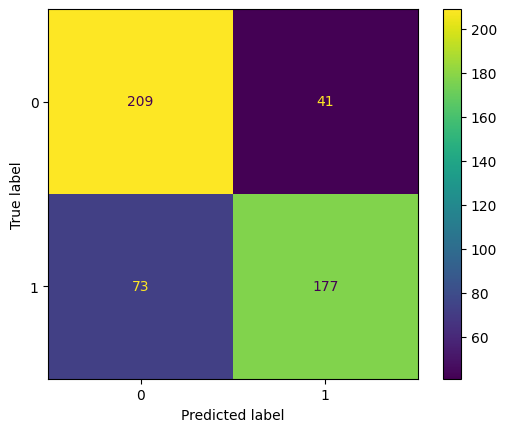

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()